# Sequence identity linked to high accuracy ?

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_path = "/nfs/scratch/pinder/negative_dataset/my_repository/datasets/deleak_uniprot/deleak_cdhit/test_predictions.csv"
df = pd.read_csv(df_path)
df.head(2)

,entry,split,receptor_seq,ligand_seq,receptor_path,ligand_path,label,max_id_to_train_receptor,max_id_to_train_ligand,pred,check_labels
0,7rzb__A1_A0A229LVN5--7rzb__A2_A0A229LVN5,test,MKEIAQQMRGELTQNGFTSLETSEAVSEYMNQVNADDTTFVVINST...,MKEIAQQMRGELTQNGFTSLETSEAVSEYMNQVNADDTTFVVINST...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,1,0.385965,0.385965,1.0,1.0
1,3t2l__A1_Q5LE95--3t2l__A2_Q5LE95,test,LRVPLQVSSAVIKQEVVTRLAPDPVPLTEGAIGIFLSGTEPEDSGY...,LRVPLQVSSAVIKQEVVTRLAPDPVPLTEGAIGIFLSGTEPEDSGY...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,1,0.454545,0.454545,1.0,1.0


In [4]:
# Average sequence identity per row (= per protein pair)
df["avg_seq_id"] = df[["max_id_to_train_receptor", "max_id_to_train_ligand"]].mean(axis=1)

df[["avg_seq_id", "max_id_to_train_receptor", "max_id_to_train_ligand", "pred"]].head(2)

,avg_seq_id,max_id_to_train_receptor,max_id_to_train_ligand,pred
0,0.385965,0.385965,0.385965,1.0
1,0.454545,0.454545,0.454545,1.0


In [5]:
df["pred_correct"] = (df["pred"] == df["label"])
df

,entry,split,receptor_seq,ligand_seq,receptor_path,ligand_path,label,max_id_to_train_receptor,max_id_to_train_ligand,pred,check_labels,avg_seq_id,pred_correct
0,7rzb__A1_A0A229LVN5--7rzb__A2_A0A229LVN5,test,MKEIAQQMRGELTQNGFTSLETSEAVSEYMNQVNADDTTFVVINST...,MKEIAQQMRGELTQNGFTSLETSEAVSEYMNQVNADDTTFVVINST...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,1,0.385965,0.385965,1.0,1.0,0.385965,True
1,3t2l__A1_Q5LE95--3t2l__A2_Q5LE95,test,LRVPLQVSSAVIKQEVVTRLAPDPVPLTEGAIGIFLSGTEPEDSGY...,LRVPLQVSSAVIKQEVVTRLAPDPVPLTEGAIGIFLSGTEPEDSGY...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,1,0.454545,0.454545,1.0,1.0,0.454545,True
2,6ikj__A1_Q9I4L6--6ikj__B1_Q9I4L6,test,GLSAEQIAVLQEQGSELRDEGWEFGMSSKVLFGNNLDRLNPDSRNT...,GLSAEQIAVLQEQGSELRDEGWEFGMSSKVLFGNNLDRLNPDSRNT...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,1,0.431373,0.431373,1.0,1.0,0.431373,True
3,8iyi__A1_Q6CVU4--8iyi__B1_Q6CVU4,test,MSELTHPTIVDGWFREISDTMWPGQAMTLRVEKILHHEKSKYQDVL...,LTHPTIVDGWFREISDTMWPGQAMTLRVEKILHHEKSKYQDVLVFK...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,1,0.420000,0.420000,1.0,1.0,0.420000,True
4,3uws__B1_A7A9N3--3uws__A1_A7A9N3,test,AFGQDGNNWMEIDDLAKGLPDDLFDFILFDACYMASVECTYELRNK...,TPEPRTTRTILVYMMANNSLNSFASKNIESMIEGATSKNLNGGNLI...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,1,0.450000,0.396226,1.0,1.0,0.423113,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3607,NaN,test,GPLGSMSTLDLNHLADLYDRKDWNACKKELLKLKVELAKQNLFVPT...,QIVHVRGDSETDLEALFNAVMNPKTANVPQTVPMCLRKLPASFCKPP,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,0,0.453744,0.468085,1.0,0.0,0.460915,False
3608,NaN,test,FNVAHGLAWSYYIGYLRLILPELQARIRTYNQHYNNLLRGAVSQRL...,DKASMTVKINESLPQGNGKALGTVTVTETAYGLLFTPHLTGLAPGI...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,0,0.437500,0.403846,0.0,0.0,0.420673,True
3609,NaN,test,DKGCTVEELLRGCIEAFDDSGKVRDPQLVRMFLMMHPWYIPSSQLA...,MELVVDASAIAALYVPEERSEQAERAVSQAQELHTLDLAAYEVAND...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,0,0.463415,0.439024,0.0,0.0,0.451220,True
3610,NaN,test,MNTYSITLPWPPSNNRYYRHNRGRTHVSAEGQAYRDNVARIIKNAM...,MTQQDFRTKVDNTVFGVRATALIVQNHKLLVTKDKGKYYTIGGAIQ...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,0,0.396226,0.422222,0.0,0.0,0.409224,True


In [13]:
# sort df descending by avg_seq_id

df = df.sort_values(by="avg_seq_id", ascending=True).reset_index()
df

,index,entry,split,receptor_seq,ligand_seq,receptor_path,ligand_path,label,max_id_to_train_receptor,max_id_to_train_ligand,pred,check_labels,avg_seq_id,pred_correct,cumulative_accuracy
0,1093,1i4m__A1_P04156--1i4m__A2_P04156,test,GAVVGGLGGYMLGSAMSRPIIHFGSDYEDRYYRENMHRYPNQVYYR...,GAVVGGLGGYMLGSAMSRPIIHFGSDYEDRYYRENMHRYPNQVYYR...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,1,0.365385,0.365385,1.0,1.0,0.365385,True,0.900332
1,1611,7y70__A1_F4KCC2--7y70__A2_F4KCC2,test,RLGSGGGVCGSVWGQNDIAYRCRTCENDPTCAICVPCFQNGDHNSH...,RLGSGGGVCGSVWGQNDIAYRCRTCENDPTCAICVPCFQNGDHNSH...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,1,0.370370,0.370370,1.0,1.0,0.370370,True,0.900305
2,1536,2j7j__A1_P03001--2j7j__A2_P03001,test,MYVCHFENCGKAFKKHNQLKVHQFSHTQQLPYECPHEGCDKRFSLP...,MYVCHFENCGKAFKKHNQLKVHQFSHTQQLPYECPHEGCDKRFSLP...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,1,0.375000,0.375000,1.0,1.0,0.375000,True,0.900277
3,588,1tq9__A1_P00669--1tq9__B1_P00669,test,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,1,0.377778,0.377778,1.0,1.0,0.377778,True,0.900249
4,627,1y4h__A1_P0C1S6--1y4h__C1_Q9EYW6,test,QVQYENTLKNFKIREQQFDNSWCAGFSMAALLNATKNTDTYNAHDI...,MYQLQFINLVYDTTKLTHLEQTNINLFIGNWSNHQLQKSICIRHGD...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,1,0.390244,0.367347,1.0,1.0,0.378795,True,0.900222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3607,1542,5khn__A1_UNDEFINED--5khn__B1_UNDEFINED,test,MVTSLIVRLVAWSVRRPVWVVVLSLLIAAFSGVYVARHFKINTDIS...,MVTSLIVRLVAWSVRRPVWVVVLSLLIAAFSGVYVARHFKINTDIS...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,1,0.516129,0.516129,1.0,1.0,0.516129,True,1.000000
3608,1089,1zva__A1_P59594--1zva__A2_P59594,test,ALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDISGGRGGDIS...,ALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDISGGRGGDIS...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,1,0.520000,0.520000,1.0,1.0,0.520000,True,1.000000
3609,5,1uus__A1_O00910--1uus__A2_O00910,test,PNLSSPQPILDTIYKLLSEQEQTLVQMIHEQSLLLNRLPPTLDENS...,PNLSSPQPILDTIYKLLSEQEQTLVQMIHEQSLLLNRLPPTLDENS...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,1,0.526316,0.526316,1.0,1.0,0.526316,True,1.000000
3610,65,3iqy__A1_P28366--3iqy__A2_P28366,test,MLGILNKMFDPTKRTLNRYEKIANDIDAIRGDYENLSDDALKHKTI...,MLGILNKMFDPTKRTLNRYEKIANDIDAIRGDYENLSDDALKHKTI...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,1,0.528678,0.528678,1.0,1.0,0.528678,True,1.000000


In [14]:
# calculate cumulative accuracy
df["cumulative_accuracy"] = df["pred_correct"].expanding().mean()
df

,index,entry,split,receptor_seq,ligand_seq,receptor_path,ligand_path,label,max_id_to_train_receptor,max_id_to_train_ligand,pred,check_labels,avg_seq_id,pred_correct,cumulative_accuracy
0,1093,1i4m__A1_P04156--1i4m__A2_P04156,test,GAVVGGLGGYMLGSAMSRPIIHFGSDYEDRYYRENMHRYPNQVYYR...,GAVVGGLGGYMLGSAMSRPIIHFGSDYEDRYYRENMHRYPNQVYYR...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,1,0.365385,0.365385,1.0,1.0,0.365385,True,1.000000
1,1611,7y70__A1_F4KCC2--7y70__A2_F4KCC2,test,RLGSGGGVCGSVWGQNDIAYRCRTCENDPTCAICVPCFQNGDHNSH...,RLGSGGGVCGSVWGQNDIAYRCRTCENDPTCAICVPCFQNGDHNSH...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,1,0.370370,0.370370,1.0,1.0,0.370370,True,1.000000
2,1536,2j7j__A1_P03001--2j7j__A2_P03001,test,MYVCHFENCGKAFKKHNQLKVHQFSHTQQLPYECPHEGCDKRFSLP...,MYVCHFENCGKAFKKHNQLKVHQFSHTQQLPYECPHEGCDKRFSLP...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,1,0.375000,0.375000,1.0,1.0,0.375000,True,1.000000
3,588,1tq9__A1_P00669--1tq9__B1_P00669,test,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,1,0.377778,0.377778,1.0,1.0,0.377778,True,1.000000
4,627,1y4h__A1_P0C1S6--1y4h__C1_Q9EYW6,test,QVQYENTLKNFKIREQQFDNSWCAGFSMAALLNATKNTDTYNAHDI...,MYQLQFINLVYDTTKLTHLEQTNINLFIGNWSNHQLQKSICIRHGD...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,1,0.390244,0.367347,1.0,1.0,0.378795,True,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3607,1542,5khn__A1_UNDEFINED--5khn__B1_UNDEFINED,test,MVTSLIVRLVAWSVRRPVWVVVLSLLIAAFSGVYVARHFKINTDIS...,MVTSLIVRLVAWSVRRPVWVVVLSLLIAAFSGVYVARHFKINTDIS...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,1,0.516129,0.516129,1.0,1.0,0.516129,True,0.900222
3608,1089,1zva__A1_P59594--1zva__A2_P59594,test,ALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDISGGRGGDIS...,ALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDISGGRGGDIS...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,1,0.520000,0.520000,1.0,1.0,0.520000,True,0.900249
3609,5,1uus__A1_O00910--1uus__A2_O00910,test,PNLSSPQPILDTIYKLLSEQEQTLVQMIHEQSLLLNRLPPTLDENS...,PNLSSPQPILDTIYKLLSEQEQTLVQMIHEQSLLLNRLPPTLDENS...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,1,0.526316,0.526316,1.0,1.0,0.526316,True,0.900277
3610,65,3iqy__A1_P28366--3iqy__A2_P28366,test,MLGILNKMFDPTKRTLNRYEKIANDIDAIRGDYENLSDDALKHKTI...,MLGILNKMFDPTKRTLNRYEKIANDIDAIRGDYENLSDDALKHKTI...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,/nfs/scratch/pinder/pinder/2024-02/test_set_pd...,1,0.528678,0.528678,1.0,1.0,0.528678,True,0.900305


<Axes: >

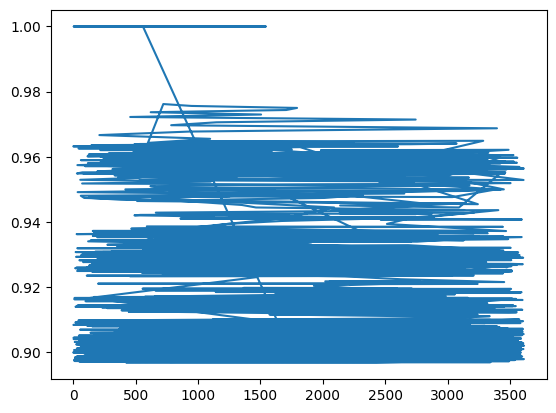

In [8]:
df["cumulative_accuracy"].plot()

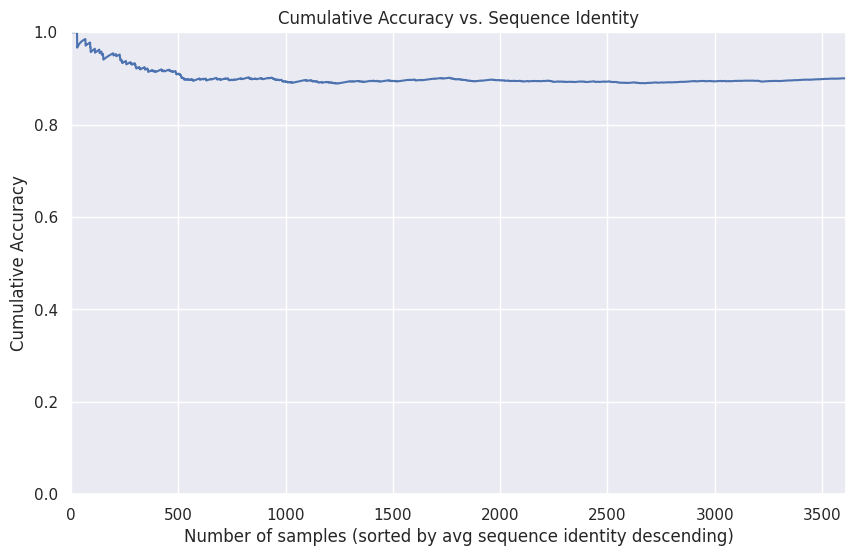

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df["cumulative_accuracy"])
plt.xlabel("Number of samples (sorted by avg sequence identity ascending)")
plt.ylabel("Cumulative Accuracy")
plt.title("Cumulative Accuracy vs. Sequence Identity")
plt.ylim(0, 1)
plt.xlim(0, len(df))
plt.show()
